<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [1]:
# !python -m pip uninstall CompStats

In [2]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@origin/develop
# %pip install -U "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"
# %pip install -U git+https://github.com/INGEOTEC/CompStats@develop
# %pip install -U CompStats

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [3]:
try:
  import CompStats
except ImportError:
  %pip install CompStats
#    %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance_multiple_metrics` function is used to calculate and analyze the performance of machine learning models for the multimetric case. On the other hand, the `plot_performance_multiple` function visualizes the performance metrics calculated by `performance_multiple_metrics`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference_multiple` and `plot_difference_multiple`; `difference_multiple` assesses the differences in performance between models in comparison to the best system for each metric, and `plot_difference_multiple` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [4]:
from CompStats import performance_multiple_metrics, plot_performance_multiple
from CompStats import difference_multiple, plot_difference_multiple
from CompStats import all_differences_multiple
#from CompStats import difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [5]:
# from CompStats.tests.test_performance import DATA
import os
# DATA = "C:\\Users\\Sergio Nava\\Documentos\\GitHub\\INGEOTEC\\CompStats\\CompStats\\tests\\data.csv"
#DATA = '/Users/nava/Documents/GitHub/DCCD/CompStats/CompStats/tests/data.csv'


`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [6]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, mean_absolute_error

# Diccionario de configuraciones de datos y métricas
configurations = {
    'detoxis_subtask1': {
        'metrics': [
            {"func": f1_score, "args": {"average": "binary"}, 'BiB': True},
            {"func": accuracy_score, 'BiB': True},
            {"func": precision_score, 'BiB': True}
        ]
    },
    'exist_task1_en_l': {
        'metrics': [
            {"func": f1_score, "args": {"average": "macro"}, 'BiB': True},
            {"func": accuracy_score, 'BiB': True},
            {"func": precision_score, 'BiB': True},
            {"func": recall_score, 'BiB': True}
        ]
    },
    'MeOffendEs_subtask3': {
        'metrics': [
            {"func": f1_score, "args": {"average": "binary"}, 'BiB': True},
            {"func": accuracy_score, 'BiB': True},
            {"func": precision_score, 'BiB': True}
        ]
    },
    'RES-MEX2021_recomendation': {
        'metrics': [
            {"func": mean_absolute_error, 'BiB': False},
            {"func": accuracy_score, 'BiB': True},
            {"func": f1_score, "args": {"average": "macro"}, 'BiB': True}
        ]
    },
    'PARMEX_2022': {
        'metrics': [
            {"func": f1_score, "args": {"average": "binary", "pos_label":1}, 'BiB': True},
            {"func": f1_score, "args": {"average": "binary", "pos_label":0}, 'BiB': True},
            {"func": accuracy_score, 'BiB': True},
            {"func": f1_score, "args": {"average": "macro"}, 'BiB': True}
        ]
    }
}

# Selecciona el conjunto de datos
selected_data = 'PARMEX_2022'  # Cambia el nombre según lo que quieras seleccionar

# Configura DATA y metrics a partir de la selección
DATA = selected_data
metrics = configurations[selected_data]['metrics']

# Verifica la selección
print(f"DATA: {DATA}")
print("Metrics:", metrics)

df = pd.read_csv(DATA+'.csv')
print(df.head())

perf = performance_multiple_metrics(df, "y", metrics,num_samples=100)

DATA: PARMEX_2022
Metrics: [{'func': <function f1_score at 0x1394445e0>, 'args': {'average': 'binary', 'pos_label': 1}, 'BiB': True}, {'func': <function f1_score at 0x1394445e0>, 'args': {'average': 'binary', 'pos_label': 0}, 'BiB': True}, {'func': <function accuracy_score at 0x13940bce0>, 'BiB': True}, {'func': <function f1_score at 0x1394445e0>, 'args': {'average': 'macro'}, 'BiB': True}]
   y  UC3M-DEEPNLP  Abu  NLP-CIC-TAGE  baseline  FRSCIC  Tü Par  Thang CIC  \
0  0             0    0             0         0       0       0          0   
1  0             0    0             0         1       0       0          0   
2  0             0    0             0         0       0       0          0   
3  0             0    0             0         0       0       0          0   
4  0             0    0             0         1       0       0          0   

   temu_bsc  
0         0  
1         1  
2         0  
3         0  
4         0  


In [7]:
perf['performance']

{'f1_score_average=binary_pos_label=1': {'UC3M-DEEPNLP': 0.8450413223140496,
  'Abu': 0.8866995073891626,
  'NLP-CIC-TAGE': 0.9424184261036468,
  'baseline': 0.8349358974358975,
  'FRSCIC': 0.8753738783649053,
  'Tü Par': 0.9373246024321796,
  'Thang CIC': 0.9021842355175689,
  'temu_bsc': 0.8440816326530612},
 'f1_score_average=binary_pos_label=0': {'UC3M-DEEPNLP': 0.9678800856531049,
  'Abu': 0.9751243781094527,
  'NLP-CIC-TAGE': 0.9869451697127938,
  'baseline': 0.9530751708428246,
  'FRSCIC': 0.9730312837108953,
  'Tü Par': 0.9853359597286058,
  'Thang CIC': 0.9775354416575791,
  'temu_bsc': 0.9567187854067528},
 'accuracy_score': {'UC3M-DEEPNLP': 0.9467896417169209,
  'Abu': 0.9592053919829727,
  'NLP-CIC-TAGE': 0.9787158566867683,
  'baseline': 0.9269244412912381,
  'FRSCIC': 0.9556580347641007,
  'Tü Par': 0.976232706633558,
  'Thang CIC': 0.963462220645619,
  'temu_bsc': 0.932245477119546},
 'f1_score_average=macro': {'UC3M-DEEPNLP': 0.9064607039835773,
  'Abu': 0.9309119427493

In [8]:

def summary_metrics(metrics_dict):
    # Crear un DataFrame vacío
    df = pd.DataFrame()
    
    # Iterar sobre cada métrica en el diccionario
    for metric, competitors in metrics_dict.items():
        # Convertir el diccionario de competidores en un DataFrame temporal
        temp_df = pd.DataFrame(list(competitors.items()), columns=['Team', metric])
        
        # Establecer 'Competitor' como índice
        temp_df.set_index('Team', inplace=True)
        
        # Unir el DataFrame temporal al DataFrame principal
        if df.empty:
            df = temp_df
        else:
            df = df.join(temp_df, how='outer')
    
    # Ordenar el DataFrame por la primera métrica (suponiendo que es la primera en el diccionario)
    first_metric = list(metrics_dict.keys())[0]  # Obtener el nombre de la primera métrica
    df.sort_values(by=first_metric, ascending=False, inplace=True)  # Ordenar de forma descendente
 
    return df

# Convertir el diccionario a un DataFrame
df_metrics = summary_metrics(perf['performance'])


# Mostrar el DataFrame resultante
print(df_metrics)


              f1_score_average=binary_pos_label=1  \
Team                                                
NLP-CIC-TAGE                             0.942418   
Tü Par                                   0.937325   
Thang CIC                                0.902184   
Abu                                      0.886700   
FRSCIC                                   0.875374   
UC3M-DEEPNLP                             0.845041   
temu_bsc                                 0.844082   
baseline                                 0.834936   

              f1_score_average=binary_pos_label=0  accuracy_score  \
Team                                                                
NLP-CIC-TAGE                             0.986945        0.978716   
Tü Par                                   0.985336        0.976233   
Thang CIC                                0.977535        0.963462   
Abu                                      0.975124        0.959205   
FRSCIC                                   0.973031      

In [9]:
#import pickle

# Suponiendo que tienes un objeto "perf"
#perf = {"nombre": "Ejemplo", "valor": 10}

#print(perf)
# Almacenar el objeto en un archivo
#with open(DATA+".dat", "wb") as archivo:
#    pickle.dump(perf, archivo)

# Recuperar el objeto del archivo
#with open(DATA+".dat", "rb") as archivo:
#    perf_recuperado = pickle.load(archivo)

perf_recuperado = perf
#print(perf_recuperado)

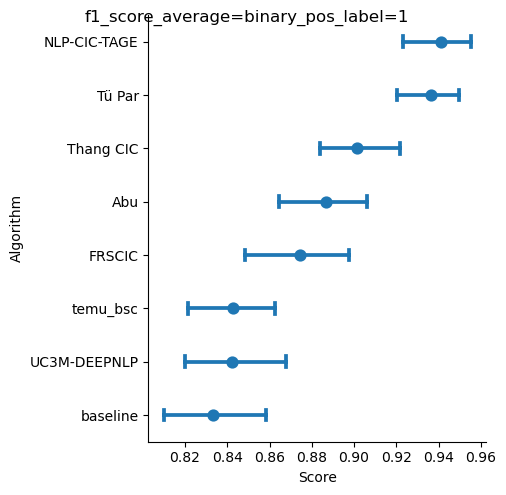

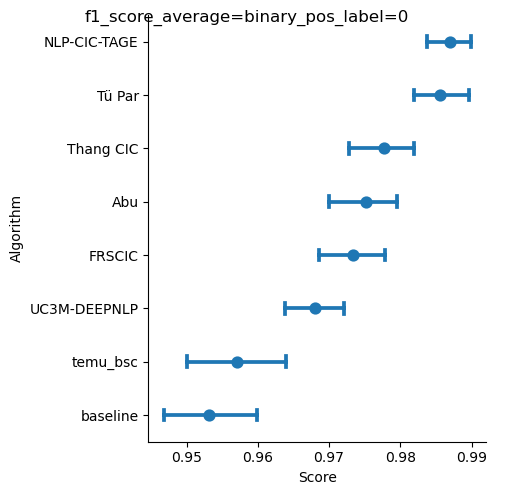

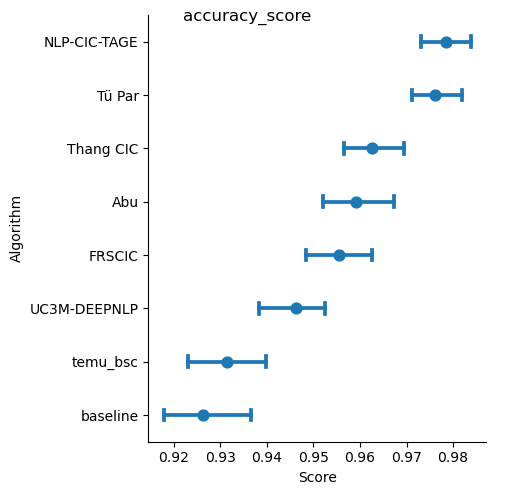

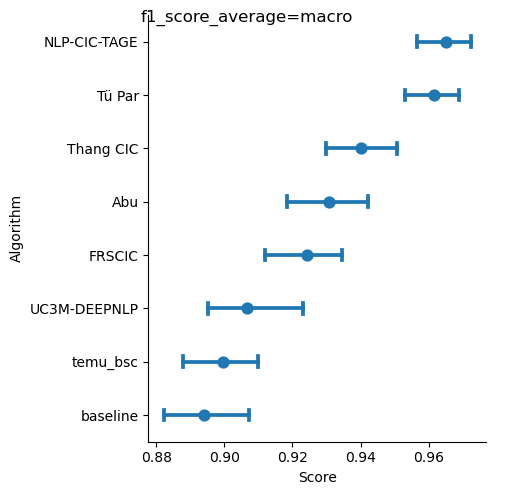

In [10]:
face_grid = plot_performance_multiple(perf_recuperado)

In [11]:

# Supongamos que perf_recuperado['samples'] es tu lista de listas
#lista_de_listas = perf_recuperado['samples']
#print(lista_de_listas)

def dict_to_wide_format_df_dynamic(data_dict):
    # Extraer los nombres de las métricas del diccionario
    metrics = list(data_dict.keys())
    # Determinar la cantidad de iteraciones (número de valores) desde la primera métrica y primer equipo
    num_iterations = len(next(iter(data_dict[metrics[0]].values())))

    # Crear una lista para almacenar los datos en formato adecuado
    data = []
    for team in data_dict[metrics[0]].keys():
        # Agregar una fila para cada iteración
        for i in range(num_iterations):  
            row = [team]
            for metric in metrics:
                row.append(data_dict[metric][team][i])
            data.append(row)
    
    # Crear el DataFrame en formato ancho con una columna por métrica
    columns = ['team'] + metrics
    df_wide_format = pd.DataFrame(data, columns=columns)
    return df_wide_format

# Generar el DataFrame en formato ancho dinámico
df_wide_format_dynamic = dict_to_wide_format_df_dynamic(perf_recuperado['samples'])



In [12]:
df_wide_format_dynamic.groupby('team')[df_wide_format_dynamic.columns[1:].tolist()].corr()

f1_score_average=binary_pos_label=1  \
team                                                                                    
Abu          f1_score_average=binary_pos_label=1                             1.000000   
             f1_score_average=binary_pos_label=0                             0.117068   
             accuracy_score                                                  0.010154   
             f1_score_average=macro                                          0.149469   
FRSCIC       f1_score_average=binary_pos_label=1                             1.000000   
             f1_score_average=binary_pos_label=0                            -0.137466   
             accuracy_score                                                 -0.132207   
             f1_score_average=macro                                          0.052852   
NLP-CIC-TAGE f1_score_average=binary_pos_label=1                             1.000000   
             f1_score_average=binary_pos_label=0                            -0.017482   
             accuracy_score                                                 -0.095929   
             f1_score_average=macro                                         -0.035868   
Thang CIC    f1_score_average=binary_pos_label=1                             1.000000   
             f1_score_average=binary_pos_label=0                            -0.073366   
             accuracy_score                                                 -0.040294   
             f1_score_average=macro                                         -0.127456   
Tü Par       f1_score_average=binary_pos_label=1                             1.000000   
             f1_score_average=binary_pos_label=0                             0.038274   
             accuracy_score                                                  0.080608   
             f1_score_average=macro                                          0.124696   
UC3M-DEEPNLP f1_score_average=binary_pos_label=1                             1.000000   
             f1_score_average=binary_pos_label=0                            -0.154429   
             accuracy_score                                                 -0.034430   
             f1_score_average=macro                                          0.015116   
baseline     f1_score_average=binary_pos_label=1                             1.000000   
             f1_score_average=binary_pos_label=0                            -0.135018   
             accuracy_score                                                 -0.026224   
             f1_score_average=macro                                         -0.102515   
temu_bsc     f1_score_average=binary_pos_label=1                             1.000000   
             f1_score_average=binary_pos_label=0                             0.172037   
             accuracy_score                                                 -0.047342   
             f1_score_average=macro                                         -0.044427   

                                                  f1_score_average=binary_pos_label=0  \
team                                                                                    
Abu          f1_score_average=binary_pos_label=1                             0.117068   
             f1_score_average=binary_pos_label=0                             1.000000   
             accuracy_score                                                  0.051298   
             f1_score_average=macro                                         -0.026443   
FRSCIC       f1_score_average=binary_pos_label=1                            -0.137466   
             f1_score_average=binary_pos_label=0                             1.000000   
             accuracy_score                                                 -0.075711   
             f1_score_average=macro                                         -0.004456   
NLP-CIC-TAGE f1_score_average=binary_pos_label=1                            -0.017482   
             f1_score_average=binary_pos_lab

In [13]:


# Crear el scatter matrix con plotly.express, coloreado por 'Fruit'
fig = px.scatter_matrix(df_wide_format_dynamic, dimensions=df_wide_format_dynamic.columns[1:].tolist(),
                        color='team', title="Scatter Matrix with Boxplots on Diagonals")

# Ajustar el tamaño del gráfico
fig.update_layout(width=800, height=800)
fig.update_traces(diagonal_visible=False, showupperhalf=False)

# Mostrar el gráfico
fig.show()

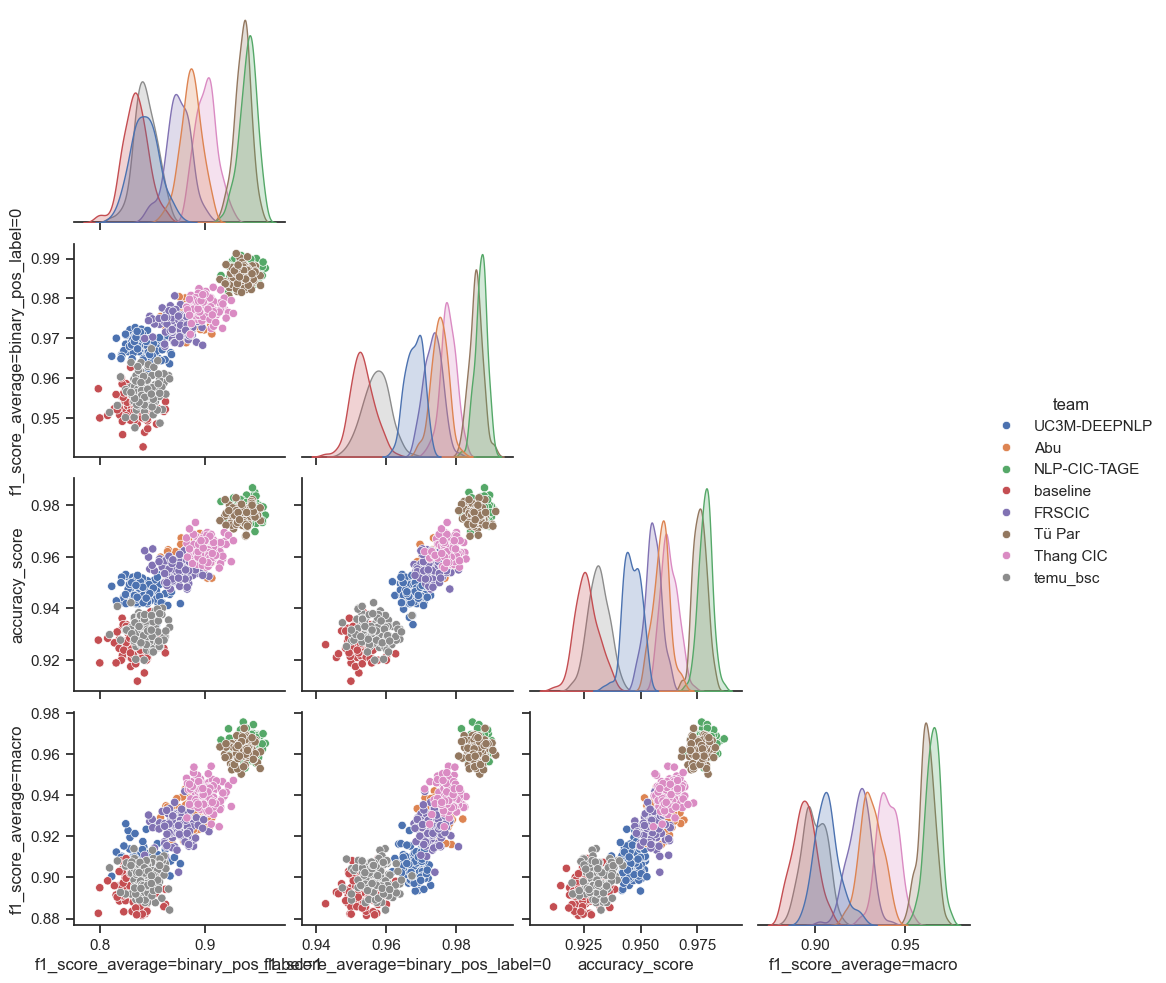

In [14]:

sns.set_theme(style="ticks")

sns.pairplot(df_wide_format_dynamic, hue='team', corner= True)

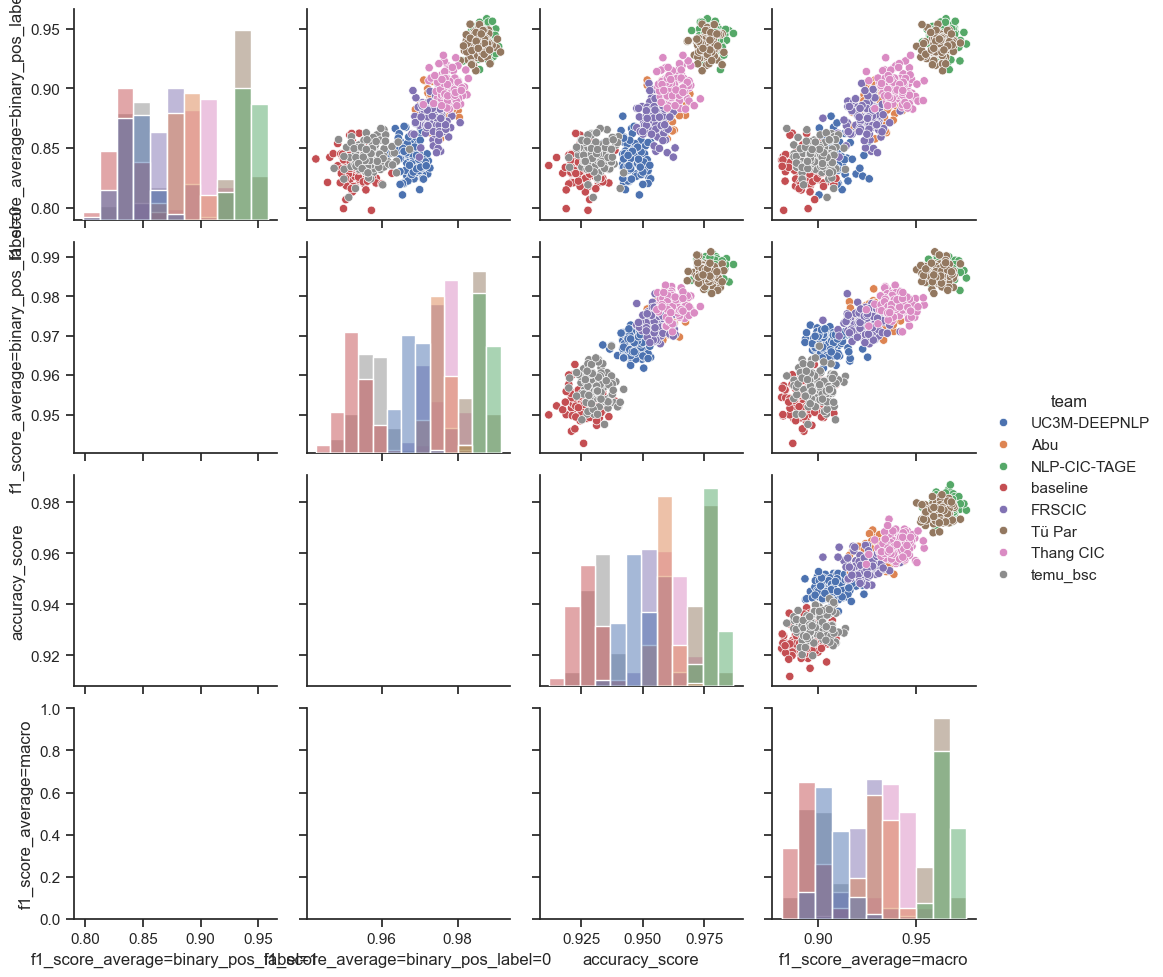

In [15]:

g = sns.PairGrid(df_wide_format_dynamic, hue="team")
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.add_legend()

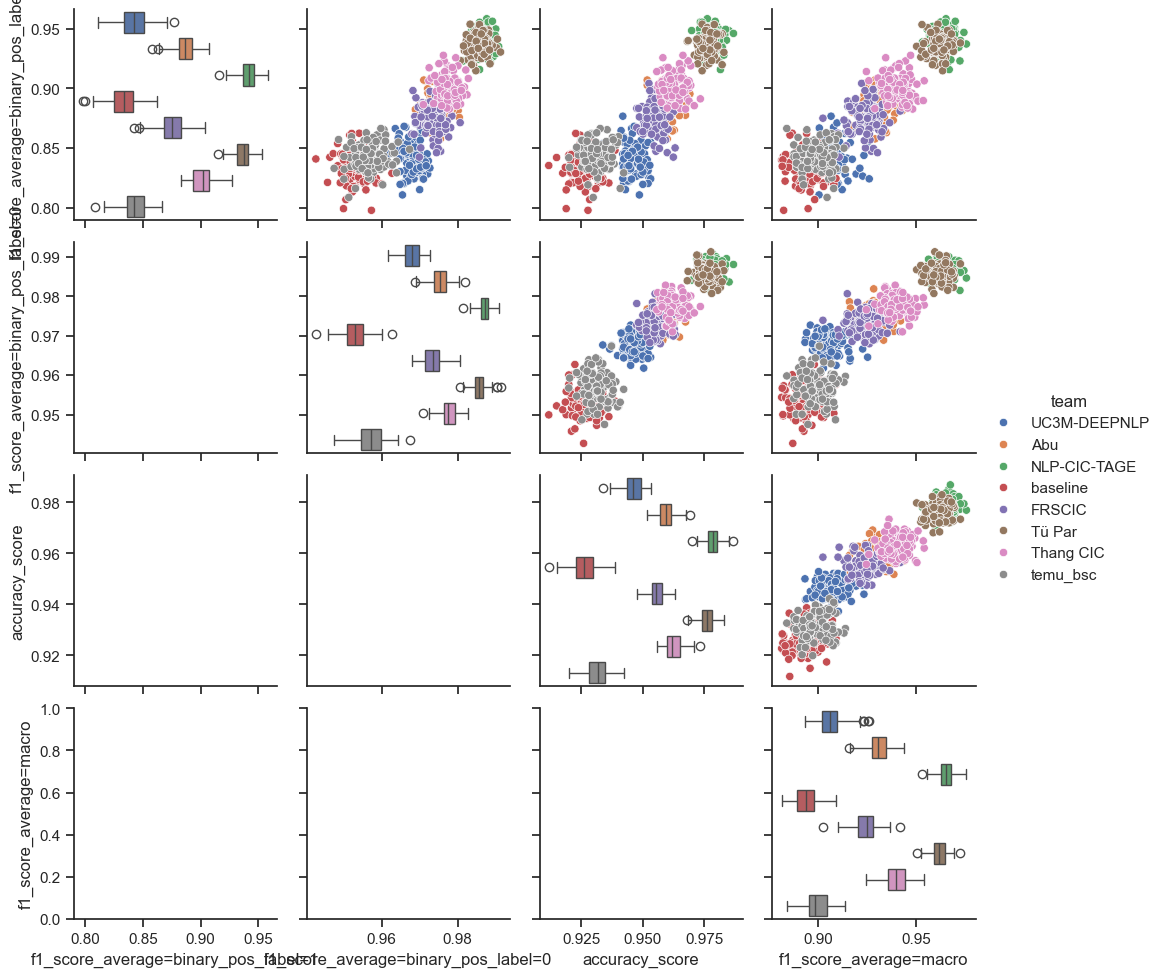

In [16]:
g = sns.PairGrid(df_wide_format_dynamic, hue="team")
g.map_upper(sns.scatterplot)
g.map_diag(sns.boxplot, y=df_wide_format_dynamic["team"], dodge=False)
g.add_legend()

In [17]:
#%pip install nbformat --upgrade
#%pip install -U plotly

In [18]:
diff = difference_multiple(perf) 

In [19]:
for metric, diffs in diff['winner'].items():
    print(f"For {metric} the best performing system is {diffs['best']}")

For f1_score_average=binary_pos_label=1 the best performing system is NLP-CIC-TAGE
For f1_score_average=binary_pos_label=0 the best performing system is NLP-CIC-TAGE
For accuracy_score the best performing system is NLP-CIC-TAGE
For f1_score_average=macro the best performing system is NLP-CIC-TAGE


In [20]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['CI'].items():
        print(f"CI for {key} {value}")



For the metric f1_score_average=binary_pos_label=1 the best is NLP-CIC-TAGE
CI for UC3M-DEEPNLP (0.07802614532898965, 0.11903622910395245)
CI for Abu (0.037507356176118736, 0.07213846917806956)
CI for baseline (0.08739749466526979, 0.13275136382701772)
CI for FRSCIC (0.04639154185886553, 0.09019947116729224)
CI for Tü Par (-0.010559204297905241, 0.020883444716035825)
CI for Thang CIC (0.021354360272406815, 0.056287040232548755)
CI for temu_bsc (0.08122178908570066, 0.11806564939163214)

For the metric f1_score_average=binary_pos_label=0 the best is NLP-CIC-TAGE
CI for UC3M-DEEPNLP (0.015554360588893344, 0.02296008980833608)
CI for Abu (0.007864361110733567, 0.015113489360716853)
CI for baseline (0.027279177106958614, 0.0411425007801617)
CI for FRSCIC (0.01009434284934423, 0.017191177378582008)
CI for Tü Par (-0.0017719941045817728, 0.005224257589714836)
CI for Thang CIC (0.006091079047137798, 0.012065861308233186)
CI for temu_bsc (0.023382039881684358, 0.03636957077006641)

For the me

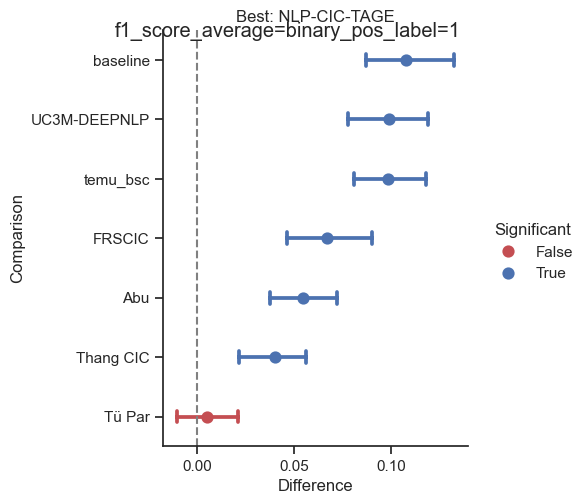

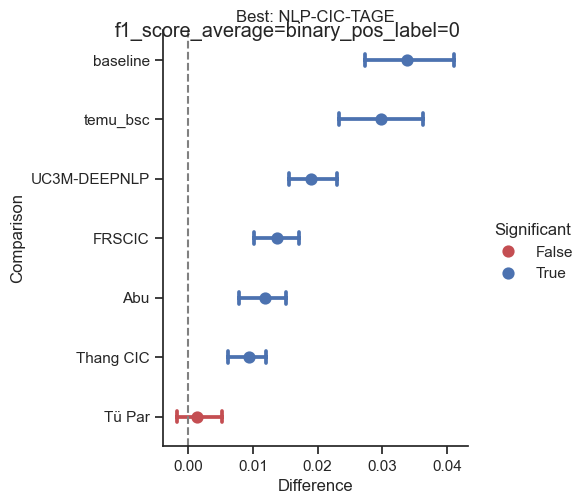

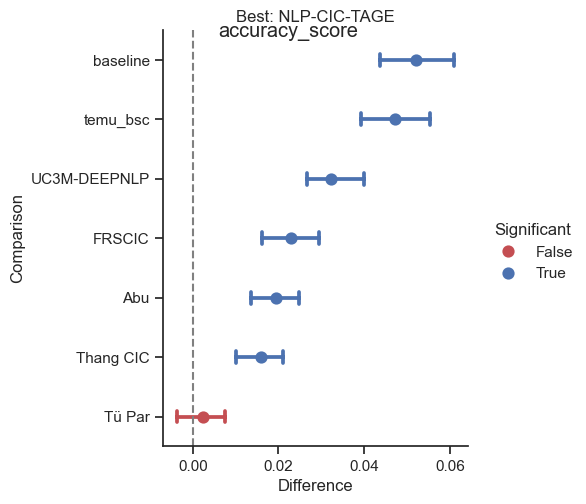

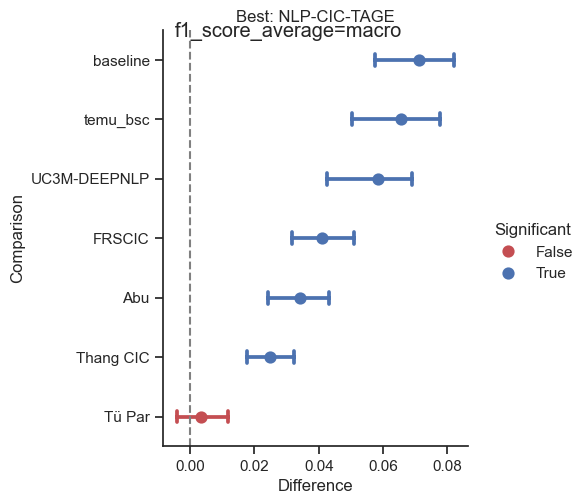

In [21]:
face_grid_diff = plot_difference_multiple(diff)

In [22]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference with {key} {value}")


For the metric f1_score_average=binary_pos_label=1 the best is NLP-CIC-TAGE
p-value for the difference with UC3M-DEEPNLP 0.0
p-value for the difference with Abu 0.0
p-value for the difference with baseline 0.0
p-value for the difference with FRSCIC 0.0
p-value for the difference with Tü Par 0.26
p-value for the difference with Thang CIC 0.0
p-value for the difference with temu_bsc 0.0

For the metric f1_score_average=binary_pos_label=0 the best is NLP-CIC-TAGE
p-value for the difference with UC3M-DEEPNLP 0.0
p-value for the difference with Abu 0.0
p-value for the difference with baseline 0.0
p-value for the difference with FRSCIC 0.0
p-value for the difference with Tü Par 0.16
p-value for the difference with Thang CIC 0.0
p-value for the difference with temu_bsc 0.0

For the metric accuracy_score the best is NLP-CIC-TAGE
p-value for the difference with UC3M-DEEPNLP 0.0
p-value for the difference with Abu 0.0
p-value for the difference with baseline 0.0
p-value for the difference with 

In [23]:
correction = 'bonferroni'
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')


For the metric f1_score_average=binary_pos_label=1 the best is NLP-CIC-TAGE
UC3M-DEEPNLP, p-value corrected by bonferroni = 0.0
Abu, p-value corrected by bonferroni = 0.0
baseline, p-value corrected by bonferroni = 0.0
FRSCIC, p-value corrected by bonferroni = 0.0
Tü Par, p-value corrected by bonferroni = 1.0
Thang CIC, p-value corrected by bonferroni = 0.0
temu_bsc, p-value corrected by bonferroni = 0.0

For the metric f1_score_average=binary_pos_label=0 the best is NLP-CIC-TAGE
UC3M-DEEPNLP, p-value corrected by bonferroni = 0.0
Abu, p-value corrected by bonferroni = 0.0
baseline, p-value corrected by bonferroni = 0.0
FRSCIC, p-value corrected by bonferroni = 0.0
Tü Par, p-value corrected by bonferroni = 1.0
Thang CIC, p-value corrected by bonferroni = 0.0
temu_bsc, p-value corrected by bonferroni = 0.0

For the metric accuracy_score the best is NLP-CIC-TAGE
UC3M-DEEPNLP, p-value corrected by bonferroni = 0.0
Abu, p-value corrected by bonferroni = 0.0
baseline, p-value corrected by 

In [24]:
all_diff = all_differences_multiple(perf)


In [25]:
all_diff['compg']

{'n': 2819,
 'm': 8,
 'cv': {'f1_score_average=binary_pos_label=1': 4.722336282448057,
  'f1_score_average=binary_pos_label=0': 1.2608597503171093,
  'accuracy_score': 1.969682491279821,
  'f1_score_average=macro': 2.88102084592794},
 'dist': {'f1_score_average=binary_pos_label=1': 0.06138173322661289,
  'f1_score_average=binary_pos_label=0': 0.012867338802619699,
  'accuracy_score': 0.021284143313231585,
  'f1_score_average=macro': 0.037124536014616294},
 'PPI': {'f1_score_average=binary_pos_label=1': 5.758157389635321,
  'f1_score_average=binary_pos_label=0': 1.305483028720622,
  'accuracy_score': 2.1284143313231696,
  'f1_score_average=macro': 3.5318202091779716}}

In [26]:
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric} ")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference {key} {value}")


For the metric f1_score_average=binary_pos_label=1 
p-value for the difference NLP-CIC-TAGE vs Tü Par 0.26
p-value for the difference NLP-CIC-TAGE vs Thang CIC 0.0
p-value for the difference NLP-CIC-TAGE vs Abu 0.0
p-value for the difference NLP-CIC-TAGE vs FRSCIC 0.0
p-value for the difference NLP-CIC-TAGE vs temu_bsc 0.0
p-value for the difference NLP-CIC-TAGE vs UC3M-DEEPNLP 0.0
p-value for the difference NLP-CIC-TAGE vs baseline 0.0
p-value for the difference Tü Par vs Thang CIC 0.0
p-value for the difference Tü Par vs Abu 0.0
p-value for the difference Tü Par vs FRSCIC 0.0
p-value for the difference Tü Par vs temu_bsc 0.0
p-value for the difference Tü Par vs UC3M-DEEPNLP 0.0
p-value for the difference Tü Par vs baseline 0.0
p-value for the difference Thang CIC vs Abu 0.1
p-value for the difference Thang CIC vs FRSCIC 0.0
p-value for the difference Thang CIC vs temu_bsc 0.0
p-value for the difference Thang CIC vs UC3M-DEEPNLP 0.0
p-value for the difference Thang CIC vs baseline 0.

In [27]:
print(all_diff['all']['accuracy_score']['p_value'])

{'NLP-CIC-TAGE vs Tü Par': 0.19, 'NLP-CIC-TAGE vs Thang CIC': 0.0, 'NLP-CIC-TAGE vs Abu': 0.0, 'NLP-CIC-TAGE vs FRSCIC': 0.0, 'NLP-CIC-TAGE vs UC3M-DEEPNLP': 0.0, 'NLP-CIC-TAGE vs temu_bsc': 0.0, 'NLP-CIC-TAGE vs baseline': 0.0, 'Tü Par vs Thang CIC': 0.0, 'Tü Par vs Abu': 0.0, 'Tü Par vs FRSCIC': 0.0, 'Tü Par vs UC3M-DEEPNLP': 0.0, 'Tü Par vs temu_bsc': 0.0, 'Tü Par vs baseline': 0.0, 'Thang CIC vs Abu': 0.14, 'Thang CIC vs FRSCIC': 0.0, 'Thang CIC vs UC3M-DEEPNLP': 0.0, 'Thang CIC vs temu_bsc': 0.0, 'Thang CIC vs baseline': 0.0, 'Abu vs FRSCIC': 0.14, 'Abu vs UC3M-DEEPNLP': 0.0, 'Abu vs temu_bsc': 0.0, 'Abu vs baseline': 0.0, 'FRSCIC vs UC3M-DEEPNLP': 0.0, 'FRSCIC vs temu_bsc': 0.0, 'FRSCIC vs baseline': 0.0, 'UC3M-DEEPNLP vs temu_bsc': 0.01, 'UC3M-DEEPNLP vs baseline': 0.0, 'temu_bsc vs baseline': 0.2}


In [28]:


def crear_matriz_triangular_inferior(p_values):
    # Extraer los términos únicos de A y B en el orden de aparición
    terms = []
    for key in p_values.keys():
        a, b = key.split(' vs ')
        if a not in terms:
            terms.append(a)
        if b not in terms:
            terms.append(b)
    
    n = len(terms)
    
    # Crear una matriz triangular inferior
    matriz = np.full((n, n), np.nan)  # Inicializar con NaN
    
    # Llenar la matriz triangular inferior
    for i in range(n):
        for j in range(i + 1):  # Solo llenar la parte inferior
            key = f"{terms[j]} vs {terms[i]}"
            if key in p_values:
                matriz[i, j] = p_values[key]

    # Convertir la matriz a un DataFrame para mejor visualización
    df_matriz = pd.DataFrame(matriz, index=terms, columns=terms)
    
    return df_matriz

def imprimir_p_values(all_diff):
    for metric, diffs in all_diff['all'].items():
        print(f"\nFor the metric {metric} ")
        matriz_resultante = crear_matriz_triangular_inferior(all_diff['all'][metric]['p_value'])
        print(matriz_resultante.to_string(na_rep=''))
imprimir_p_values(all_diff)


For the metric f1_score_average=binary_pos_label=1 
              NLP-CIC-TAGE  Tü Par  Thang CIC   Abu  FRSCIC  temu_bsc  UC3M-DEEPNLP  baseline
NLP-CIC-TAGE                                                                                 
Tü Par                0.26                                                                   
Thang CIC             0.00     0.0                                                           
Abu                   0.00     0.0        0.1                                                
FRSCIC                0.00     0.0        0.0  0.12                                          
temu_bsc              0.00     0.0        0.0  0.00     0.0                                  
UC3M-DEEPNLP          0.00     0.0        0.0  0.00     0.0      0.49                        
baseline              0.00     0.0        0.0  0.00     0.0      0.19           0.3          

For the metric f1_score_average=binary_pos_label=0 
              NLP-CIC-TAGE  Tü Par  Thang CIC  A

In [29]:
correction = 'bonferroni'
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')


For the metric f1_score_average=binary_pos_label=1
NLP-CIC-TAGE vs Tü Par, p-value corrected by bonferroni = 1.0
NLP-CIC-TAGE vs Thang CIC, p-value corrected by bonferroni = 0.0
NLP-CIC-TAGE vs Abu, p-value corrected by bonferroni = 0.0
NLP-CIC-TAGE vs FRSCIC, p-value corrected by bonferroni = 0.0
NLP-CIC-TAGE vs temu_bsc, p-value corrected by bonferroni = 0.0
NLP-CIC-TAGE vs UC3M-DEEPNLP, p-value corrected by bonferroni = 0.0
NLP-CIC-TAGE vs baseline, p-value corrected by bonferroni = 0.0
Tü Par vs Thang CIC, p-value corrected by bonferroni = 0.0
Tü Par vs Abu, p-value corrected by bonferroni = 0.0
Tü Par vs FRSCIC, p-value corrected by bonferroni = 0.0
Tü Par vs temu_bsc, p-value corrected by bonferroni = 0.0
Tü Par vs UC3M-DEEPNLP, p-value corrected by bonferroni = 0.0
Tü Par vs baseline, p-value corrected by bonferroni = 0.0
Thang CIC vs Abu, p-value corrected by bonferroni = 1.0
Thang CIC vs FRSCIC, p-value corrected by bonferroni = 0.0
Thang CIC vs temu_bsc, p-value corrected by

In [30]:
correction = 'bonferroni'
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    print(f"p-values after correction: {p_valuesC}")   


For the metric f1_score_average=binary_pos_label=1
p-values after correction: {'NLP-CIC-TAGE vs Tü Par': 1.0, 'NLP-CIC-TAGE vs Thang CIC': 0.0, 'NLP-CIC-TAGE vs Abu': 0.0, 'NLP-CIC-TAGE vs FRSCIC': 0.0, 'NLP-CIC-TAGE vs temu_bsc': 0.0, 'NLP-CIC-TAGE vs UC3M-DEEPNLP': 0.0, 'NLP-CIC-TAGE vs baseline': 0.0, 'Tü Par vs Thang CIC': 0.0, 'Tü Par vs Abu': 0.0, 'Tü Par vs FRSCIC': 0.0, 'Tü Par vs temu_bsc': 0.0, 'Tü Par vs UC3M-DEEPNLP': 0.0, 'Tü Par vs baseline': 0.0, 'Thang CIC vs Abu': 1.0, 'Thang CIC vs FRSCIC': 0.0, 'Thang CIC vs temu_bsc': 0.0, 'Thang CIC vs UC3M-DEEPNLP': 0.0, 'Thang CIC vs baseline': 0.0, 'Abu vs FRSCIC': 1.0, 'Abu vs temu_bsc': 0.0, 'Abu vs UC3M-DEEPNLP': 0.0, 'Abu vs baseline': 0.0, 'FRSCIC vs temu_bsc': 0.0, 'FRSCIC vs UC3M-DEEPNLP': 0.0, 'FRSCIC vs baseline': 0.0, 'temu_bsc vs UC3M-DEEPNLP': 1.0, 'temu_bsc vs baseline': 1.0, 'UC3M-DEEPNLP vs baseline': 1.0}

For the metric f1_score_average=binary_pos_label=0
p-values after correction: {'NLP-CIC-TAGE vs Tü Par': 1.

In [31]:
def aplicar_correccion_e_imprimir(all_diff, correction="bonferroni"):
    for metric, diffs in all_diff['all'].items():
        print(f"\nMatriz de p-valores corregidos por {correction} para la métrica: {metric}")
        
        # Aplicar la corrección a los p-valores
        result = multipletests(list(diffs['p_value'].values()), method=correction)
        p_valuesC = dict(zip(diffs['p_value'].keys(), result[1])) 
        # print(p_valuesC)
        matriz_resultante = crear_matriz_triangular_inferior(p_valuesC)
        print(matriz_resultante.to_string(na_rep=''))
aplicar_correccion_e_imprimir(all_diff,"bonferroni")




Matriz de p-valores corregidos por bonferroni para la métrica: f1_score_average=binary_pos_label=1
{'NLP-CIC-TAGE vs Tü Par': 1.0, 'NLP-CIC-TAGE vs Thang CIC': 0.0, 'NLP-CIC-TAGE vs Abu': 0.0, 'NLP-CIC-TAGE vs FRSCIC': 0.0, 'NLP-CIC-TAGE vs temu_bsc': 0.0, 'NLP-CIC-TAGE vs UC3M-DEEPNLP': 0.0, 'NLP-CIC-TAGE vs baseline': 0.0, 'Tü Par vs Thang CIC': 0.0, 'Tü Par vs Abu': 0.0, 'Tü Par vs FRSCIC': 0.0, 'Tü Par vs temu_bsc': 0.0, 'Tü Par vs UC3M-DEEPNLP': 0.0, 'Tü Par vs baseline': 0.0, 'Thang CIC vs Abu': 1.0, 'Thang CIC vs FRSCIC': 0.0, 'Thang CIC vs temu_bsc': 0.0, 'Thang CIC vs UC3M-DEEPNLP': 0.0, 'Thang CIC vs baseline': 0.0, 'Abu vs FRSCIC': 1.0, 'Abu vs temu_bsc': 0.0, 'Abu vs UC3M-DEEPNLP': 0.0, 'Abu vs baseline': 0.0, 'FRSCIC vs temu_bsc': 0.0, 'FRSCIC vs UC3M-DEEPNLP': 0.0, 'FRSCIC vs baseline': 0.0, 'temu_bsc vs UC3M-DEEPNLP': 1.0, 'temu_bsc vs baseline': 1.0, 'UC3M-DEEPNLP vs baseline': 1.0}
              NLP-CIC-TAGE  Tü Par  Thang CIC  Abu  FRSCIC  temu_bsc  UC3M-DEEPNLP  bas

In [34]:
all_diff['all'][metric]['p_value']

8